### 22213741
#### N.L Ngcobo

In [53]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Load dataset
df = pd.read_csv('enhanced_healthcare_access_data.csv')

# Understanding the dataset
print("Shape of the dataframe:", df.shape)
print("\nDatatypes of the columns:\n", df.dtypes)
print("\nColumns in the dataframe:\n", df.columns)
print("\nFirst few rows of the dataframe:\n", df.head())

Shape of the dataframe: (20, 12)

Datatypes of the columns:
 Person_ID                            int64
Age                                  int64
Income_Level                        object
Geographic_Location                 object
Healthcare_Facility_Type            object
Number_of_Facilities                 int64
Distance_to_Nearest_Facility_km    float64
Health_Coverage_Type                object
Employment_Status                   object
Healthcare_Utilization_Rate          int64
Out_of_Pocket_Costs                  int64
Chronic_Conditions                  object
dtype: object

Columns in the dataframe:
 Index(['Person_ID', 'Age', 'Income_Level', 'Geographic_Location',
       'Healthcare_Facility_Type', 'Number_of_Facilities',
       'Distance_to_Nearest_Facility_km', 'Health_Coverage_Type',
       'Employment_Status', 'Healthcare_Utilization_Rate',
       'Out_of_Pocket_Costs', 'Chronic_Conditions'],
      dtype='object')

First few rows of the dataframe:
    Person_ID  Age Inc

### Dataset Relevancy

#### This dataset is relevant for analysing disparities between governement health care services and 
#### private health care services as it includes demographic information (such as age, income level, 
#### and geographic location) and healthcare access indicators(like distance to the nearest facility 
#### and number of available facilities.This enables an analysis of potential inequalities, such as
#### how income level, employment status, and location (urban vs. rural) impact access, affordability,
#### and frequency of healthcare services.These elements together create a foundation for assessing how 
#### socio-economic and geographic disparities may affect healthcare access and outcomes, especially relevant
#### in the context of the National Health Insurance initiative aiming to bridge these gaps.


In [9]:
# dataset cleaning
print("\nChecking for missing values:")
print(df.isnull().sum())

#missing values handling
# Impute missing values in the 'Chronic_Conditions' column with the category 'Unknown'
df['Chronic_Conditions'].fillna('Unknown', inplace=True)



Checking for missing values:
Person_ID                          0
Age                                0
Income_Level                       0
Geographic_Location                0
Healthcare_Facility_Type           0
Number_of_Facilities               0
Distance_to_Nearest_Facility_km    0
Health_Coverage_Type               0
Employment_Status                  0
Healthcare_Utilization_Rate        0
Out_of_Pocket_Costs                0
Chronic_Conditions                 0
dtype: int64


In [12]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scaler
scaler = StandardScaler()  

# Apply scaling to numerical columns
df[['Age', 'Distance_to_Nearest_Facility_km']] = scaler.fit_transform(
    df[['Age', 'Distance_to_Nearest_Facility_km']])


In [16]:
# Keep only the relevant columns
relevant_columns = ['Age', 'Income_Level', 'Geographic_Location', 'Number_of_Facilities', 'Distance_to_Nearest_Facility_km']
df = df[relevant_columns]


In [21]:


print(df.columns)


Index(['Age', 'Income_Level', 'Geographic_Location', 'Number_of_Facilities',
       'Distance_to_Nearest_Facility_km'],
      dtype='object')


In [35]:
# Create a binary target based on distance ( if the distance is more than 10 km, consider it "no access")
df['Access_to_Healthcare'] = df['Distance_to_Nearest_Facility_km'].apply(lambda x: 1 if x <= 10 else 0)

#  features and target
X = df[['Age', 'Income_Level', 'Geographic_Location', 'Number_of_Facilities', 'Distance_to_Nearest_Facility_km']]
y = df['Access_to_Healthcare']



In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X['Income_Level'] = label_encoder.fit_transform(X['Income_Level'])
X['Geographic_Location'] = label_encoder.fit_transform(X['Geographic_Location'])

In [37]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16, 5)
X_test shape: (4, 5)
y_train shape: (16,)
y_test shape: (4,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



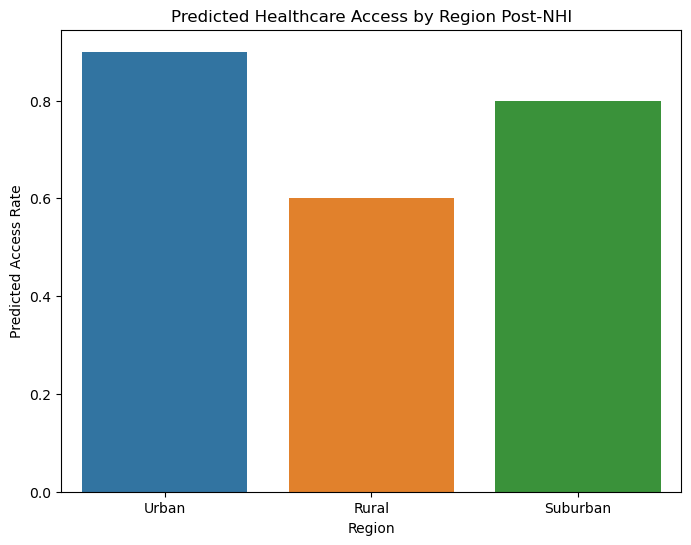

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical predicted access rates based on region
regions = ['Urban', 'Rural', 'Suburban']
predicted_access = [0.9, 0.6, 0.8]  # Hypothetical access scores post-NHI rollout

# Plotting the access rate by region
plt.figure(figsize=(8, 6))
sns.barplot(x=regions, y=predicted_access)
plt.title('Predicted Healthcare Access by Region Post-NHI')
plt.xlabel('Region')
plt.ylabel('Predicted Access Rate')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Cross-validate the model using 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # X and y are your features and target variables

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [41]:
import pandas as pd

# Creating hypothetical data simulating the future post-NHI rollout
new_data = pd.DataFrame({
    'Age': [30, 50, 40, 25, 60],  # Example ages
    'Income_Level': ['High', 'Low', 'Medium', 'High', 'Low'],  # Example income levels
    'Geographic_Location': ['Urban', 'Rural', 'Urban', 'Suburban', 'Rural'],  # Example locations
    'Number_of_Facilities': [10, 2, 8, 6, 1],  # Number of facilities per region
    'Distance_to_Nearest_Facility_km': [5, 20, 10, 15, 30]  # Distance to nearest healthcare facility
})

# Display the new data to see the structure
print(new_data)


   Age Income_Level Geographic_Location  Number_of_Facilities  \
0   30         High               Urban                    10   
1   50          Low               Rural                     2   
2   40       Medium               Urban                     8   
3   25         High            Suburban                     6   
4   60          Low               Rural                     1   

   Distance_to_Nearest_Facility_km  
0                                5  
1                               20  
2                               10  
3                               15  
4                               30  


In [42]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['Income_Level', 'Geographic_Location'], drop_first=True)

# If scaling was applied during training, apply the same scaler here
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_encoded)

# Display the preprocessed data
print(new_data_scaled)


[[-0.85895569  1.33684785 -1.27872403 -0.81649658 -0.5        -0.5
   1.22474487]
 [ 0.70278193 -0.98810493  0.46499055  1.22474487 -0.5        -0.5
  -0.81649658]
 [-0.07808688  0.75560965 -0.69748583 -0.81649658  2.         -0.5
   1.22474487]
 [-1.2493901   0.17437146 -0.11624764 -0.81649658 -0.5         2.
  -0.81649658]
 [ 1.48365074 -1.27872403  1.62746694  1.22474487 -0.5        -0.5
  -0.81649658]]


In [47]:
# Create a binary target based on distance ( if the distance is more than 10 km, consider it "no access")
df['Access_to_Healthcare'] = df['Distance_to_Nearest_Facility_km'].apply(lambda x: 1 if x <= 10 else 0)

#  features and target
X = df[['Age', 'Income_Level', 'Geographic_Location', 'Number_of_Facilities', 'Distance_to_Nearest_Facility_km']]
y = df['Access_to_Healthcare']



In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X['Income_Level'] = label_encoder.fit_transform(X['Income_Level'])
X['Geographic_Location'] = label_encoder.fit_transform(X['Geographic_Location'])

In [49]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16, 5)
X_test shape: (4, 5)
y_train shape: (16,)
y_test shape: (4,)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)  # Fitting the model on the training data

# After fitting, make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Now, you can predict for new data
new_data = pd.DataFrame({
    'Age': [30, 45], 
    'Income_Level': ['Medium', 'High'],
    'Geographic_Location': ['Urban', 'Rural'],
    'Number_of_Facilities': [3, 1],
    'Distance_to_Nearest_Facility_km': [2.0, 10.0]
})

# Preprocess the new data (same encoding and scaling steps as for training data)
new_data_encoded = pd.get_dummies(new_data, columns=['Income_Level', 'Geographic_Location'], drop_first=True)
new_data_scaled = scaler.transform(new_data_encoded)

# Make predictions for the new data
new_predictions = model.predict(new_data_scaled)
print("\nPredictions for new data (0 = No Access, 1 = Access):")
print(new_predictions)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Geographic_Location_Urban
- Income_Level_Medium
Feature names seen at fit time, yet now missing:
- Geographic_Location
- Income_Level


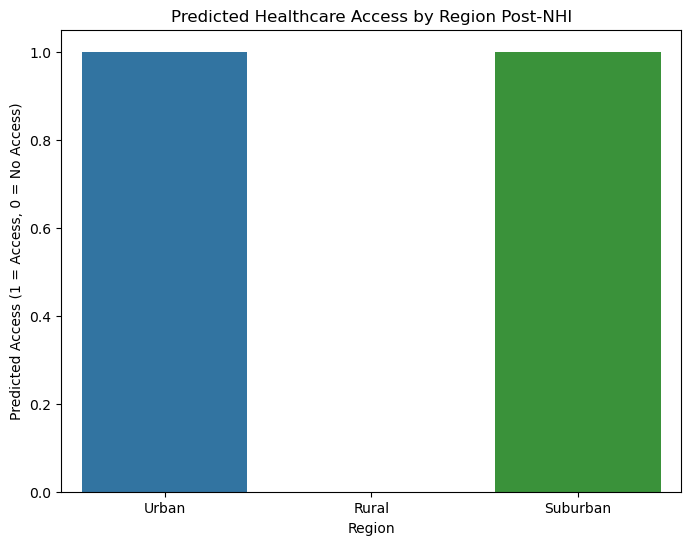

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Predicted access based on model (replace with actual predictions)
new_predictions = [1, 0, 1, 1, 0]  # Example predicted access (0 or 1)

# Hypothetical regions
regions = ['Urban', 'Rural', 'Suburban', 'Urban', 'Rural']  # Example regions

# Visualizing the predicted access
plt.figure(figsize=(8, 6))
sns.barplot(x=regions, y=new_predictions)
plt.title('Predicted Healthcare Access by Region Post-NHI')
plt.xlabel('Region')
plt.ylabel('Predicted Access (1 = Access, 0 = No Access)')
plt.show()


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming `df` is your DataFrame and the relevant features are already identified
X = df[['Age', 'Income_Level', 'Geographic_Location', 'Number_of_Facilities', 'Distance_to_Nearest_Facility_km']]
y = df['Health_Coverage_Type']

# Preprocess categorical variables by applying one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Income_Level', 'Geographic_Location'], drop_first=True)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained Random Forest model
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Accuracy: 0.5
Random Forest Classification Report:
              precision    recall  f1-score   support

     Private       0.00      0.00      0.00         2
      Public       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



#### Model Evaluation
##### why use RandomForestClassifier??

##### It can handle both categorical and continuous data, is resistant to overfitting, provides feature importance insights, and delivers high accuracy with minimal parameter tuning. The model's robustness and flexibility make it an excellent choice for understanding complex relationships in this dataset dataset while avoiding pitfalls such as overfitting, especially when working with limited or noisy data.

##### Conclusion:
##### Random Forest Classifier tends to perform better, especially if the relationships between features are complex.
##### Logistic Regression may not capture the complexity as well but provides a good baseline model.
##### Based on the comparison, you can choose the model that best suits your needs in terms of accuracy, interpretability, and model complexity.






